In [76]:
# Carsel and Parish 1988

using CairoMakie, ColorSchemes
import SpecialFunctions: erfc, erfcinv
using Formatting

include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Cst.jl")
include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Hydro\Wrc.jl")
include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Hydro\HydroRelation.jl")
include(raw"D:\JOE\MAIN\MODELS\AquaPore_Toolkit\src\Hydro\Kunsat.jl")


Main.kunsat

In [77]:
				# ================================================================
				# Plotting parameters
					ColourOption_No    = 1
					Linewidth          = 3
					height             = 200
					labelsize          = 30
					textcolor          = :blue
					textsize           = 30
					titlecolor         = :navyblue
					titlesize          = 18.0
					width              = height * 3.0
					xgridstyle         = :dash
					xgridvisible       = true
					xlabelSize         = 20
					xlabelpadding      = 5
					xminortickalign    = 1.0
					xminorticksvisible = true
					xtickalign         = 0.9 # 0 is inside and 1 is outside
					xticklabelrotation = π / 4.0
					xticksize          = 10
					xticksmirrored     = false
					xtickwidt          = 0.5
					xtrimspine         = false
					ygridstyle         = :dash
					ygridvisible       = false
					ylabelpadding      = xlabelpadding
					ylabelsize         = xlabelSize
					yminortickalign    = xminortickalign
					yminorticksvisible = true
					ytickalign         = xtickalign
					yticksize          = xticksize
					yticksmirrored     = false
					ytickwidt          = xtickwidt
					ytrimspine         = false

					Markersize = 12

					ColourOption = [:glasbey_hv_n256,:seaborn_bright,:seaborn_colorblind,:seaborn_dark,:seaborn_deep,:tab10,:tableau_10,:tol_bright]

					Colormap = cgrad(colorschemes[ColourOption[ColourOption_No]], size(colorschemes[ColourOption[ColourOption_No]]), categorical=true)


In [78]:
θs =[0.43,
0.41,
0.41,
0.40,
0.46,
0.45,
0.39,
0.41,
0.43,
0.38,
0.36,
0.38]

θr =[0.040000587,
0.052015954,
0.060514159,
0.1,
0.072650556,
0.093697453,
0.104725023,
0.121582641,
0.137096464,
0.102554262,
0.164050547,
0.143041418]

Ks = [0.0825,
0.040532407,
0.012280093,
0.002888889,
0.000694444,
0.001201389,
0.003638889,
0.000722222,
0.000194444,
0.000333333,
5.56E-05,
0.000555556]

# Ψm = [100
# 127.1514065
# 319.2419123
# 1107.554381
# 3571.676601
# 2577.085214
# 1060.359189
# 5201.720212
# 14943.92119
# 14081.66764
# 166923.1213
# 173182.1584]

σ = [0.767528364,
0.84759782,
1.154454689,
1.56910817,
1.959401769,
1.850609728,
1.554592632,
2.084719856,
2.436491598,
2.416681323,
3.24090118,
3.253171388]

θsMacMat =[0.43,
0.41,
0.41,
0.40,
0.46,
0.45,
0.39,
0.41,
0.43,
0.38,
0.36,
0.38]

ΨmMac =[10
10
10
10
10
10
10
10
10
10
10
10]

Ks =[0.0825
0.040532407
0.012280093
0.002888889
0.000694444
0.001201389
0.003638889
0.000722222
0.000194444
0.000333333
5.56E-05
0.000555556]


Id = ["Sand"
"Loamy sand"
"Sandy loam"
"Loam"
"Silt"
"Silt loam"
"Sandy clay loam"
"Clay loam"
"SiltyClayloam"
"Sandy clay"
"Silty clay"
"Clay"]


12-element Vector{String}:
 "Sand"
 "Loamy sand"
 "Sandy loam"
 "Loam"
 "Silt"
 "Silt loam"
 "Sandy clay loam"
 "Clay loam"
 "SiltyClayloam"
 "Sandy clay"
 "Silty clay"
 "Clay"

In [79]:

#  For every ψ
	Ψ_Min_Log = log10(0.0001)
	# Ψ_Min_Log = log10(1)
	Ψ_Max_Log = log10(5000_00.0)

	Ψ_Sim = 10.0.^(collect(Ψ_Min_Log:0.001:Ψ_Max_Log))
	R_Sim = cst.Y ./ Ψ_Sim

	N_Ψ  = length(Ψ_Sim)

   θ_Sim    = zeros(N_Ψ, 12)
   KΨ_Sim   = zeros(N_Ψ, 12)
   ∂θ∂R_Sim = zeros(N_Ψ, 12)
	∂θ∂Ψ_Sim = zeros(N_Ψ, 12)

	Ψm = zeros(12, 12)

	ΨmacMat = 100.0
	σ_Min=0.7
	σ_Max=4.0


for iCarsel=1:12
	Ψm[iCarsel] = √(ΨmacMat) * exp(σ[iCarsel] * 3.0)
	println(Ψm[iCarsel])

	for iΨ = 1:N_Ψ
		θ_Sim[iΨ, iCarsel] = wrc.kg.Ψ_2_θ(;Ψ₁=Ψ_Sim[iΨ], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], θr=θr[iCarsel], Ψm=Ψm[iCarsel], σ=σ[iCarsel], ΨmMac=ΨmMac[iCarsel], ΨmacMat, σMac=1.1, KosugiModel_θΨ⍰="Traditional", ΨmacMat_2_σMac_ΨmMac=false, Pσ_Mac=2.0)

		KΨ_Sim[iΨ, iCarsel] = kunsat.kg.KUNSAT_θΨSe(;Ψ₁=Ψ_Sim[iΨ], KosugiModel_σ_2_Tb=false, Ks=Ks[iCarsel], KosugiModel_KΨ⍰="Traditional", θr=θr[iCarsel], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], σ=σ[iCarsel], σ_Min=0.7, σ_Max=4.0, τa=0.5, τb=1.103, τc=1.0, τₚ=1.9, τaMac=0.5, τbMac=0.6, τcMac=2.0, Ψm=Ψm[iCarsel], ΨmacMat, ΨmMac=ΨmMac[iCarsel])

		∂θ∂Ψ_Sim[iΨ, iCarsel] = wrc.kg.∂θ∂Ψ(;Ψ₁=Ψ_Sim[iΨ], θr=θr[iCarsel], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], σ=σ[iCarsel], Ψm=Ψm[iCarsel], ΨmMac=ΨmMac[iCarsel], ΨmacMat, σMac=1.1, KosugiModel_θΨ⍰="Traditional", ΨmacMat_2_σMac_ΨmMac=true)

		∂θ∂R_Sim[iΨ, iCarsel] = wrc.kg.∂θ∂R(;R₁=R_Sim[iΨ], θs=θs[iCarsel], θsMacMat=θsMacMat[iCarsel], θr=θr[iCarsel], Rm=cst.Y / Ψm[iCarsel], σ=σ[iCarsel], RmMac=cst.Y / ΨmMac[iCarsel],  σMac=1.1, KosugiModel_θΨ⍰="Traditional", ΨmacMat_2_σMac_ΨmMac=false)
	end
end




99.99999990059544
127.15140642993867
319.24191192969175
1107.554380775358
3571.676598608553
2577.0852133713497
1060.3591908450412
5201.720217878417
14943.921193403694
14081.667625279117
166923.12114750576
173182.15818126613


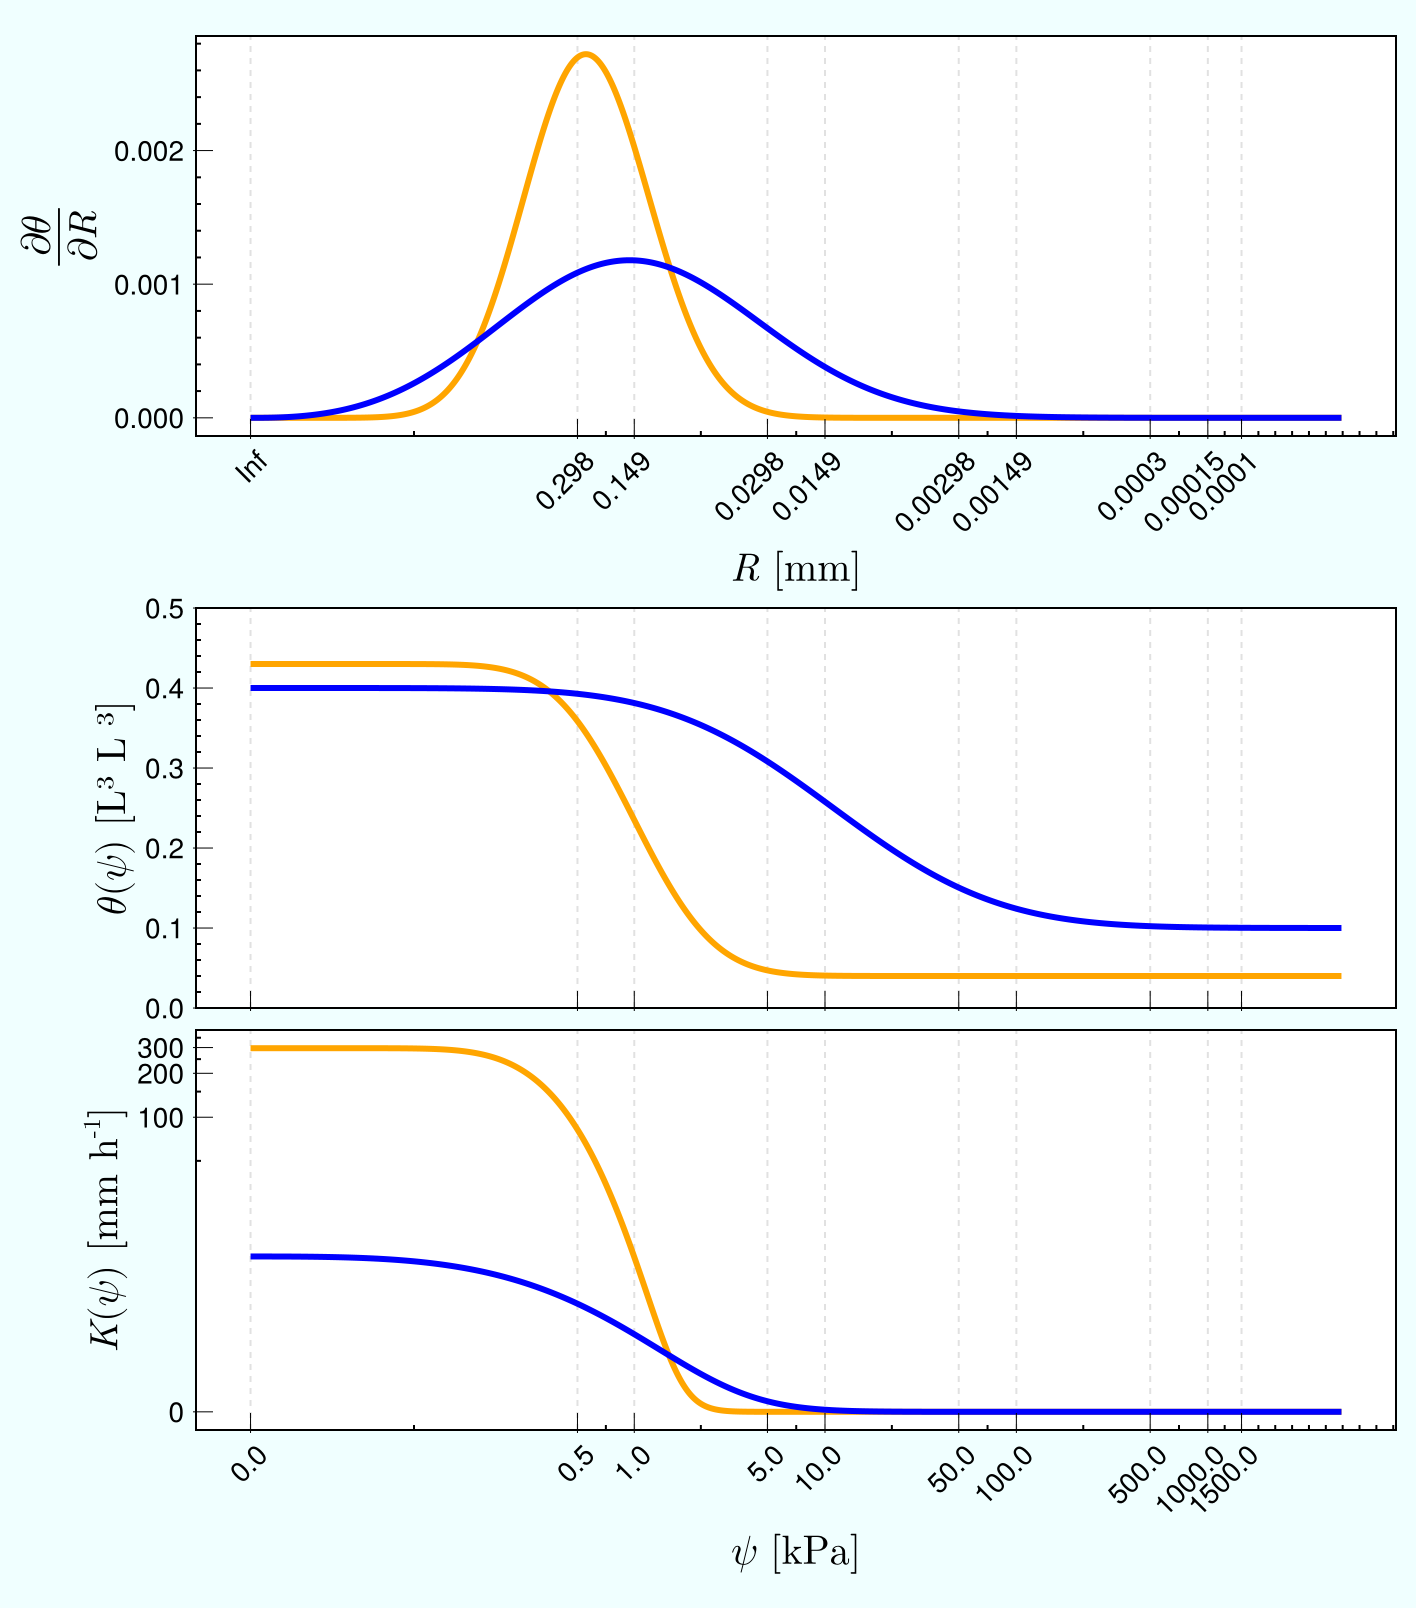

CairoMakie.Screen{IMAGE}


In [80]:

Ψticks = [0, 50, 100, 500, 1000,5000,100_00, 500_00, 1000_00, 1500_00] # mm
Ψticks
Rticks = round.(cst.Y ./ Ψticks, digits=5)

Ψ_Log = Array{Float64}(undef, N_Ψ)
R_Log = Array{Float64}(undef, N_Ψ)
for iZ=1:N_Ψ
	Ψ_Log[iZ] = log1p(Ψ_Sim[iZ])
	R_Log[iZ] = log(cst.Y / Ψ_Sim[iZ])
end

# Starting to plot
	CairoMakie.activate!(type="svg", pt_per_unit=1)
	Fig =  Figure(figure_padding = 10; fonts = ( ; regular="CMU Serif"), backgroundcolor = :azure)

# Axis_∂θ∂R = Axis(Fig[1, 1], xlabel= L"$R$ [mm]", ylabel=L"\frac{\partial \theta}{\partial \psi}" ,  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign, titlefont = "CMU Serif")

# Axis_∂θ∂R.xticks = (log1p.(Ψticks), string.(Rticks))

# lines!(Axis_∂θ∂R, R_Log, ∂θ∂R_Sim[:, 1], linewidth=Linewidth, color=:orange, label= Id[1])
# lines!(Axis_∂θ∂R, R_Log, ∂θ∂R_Sim[:, 4], linewidth=Linewidth, color=:blue, label=Id[4])
# # lines!(Axis_∂θ∂R, R_Log, ∂θ∂R_Sim[:, 9], linewidth=Linewidth, color=:green, label=Id[9])

Axis_∂θ∂Ψ = Axis(Fig[1, 1], xlabel= L"$R$ [mm]" , ylabel=L"\frac{\partial \theta}{\partial R}",  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign,  titlefont = "CMU Serif")

	Axis_∂θ∂Ψ.xticks = (log1p.(Ψticks), string.(Rticks))
	# hidexdecorations!(Axis_∂θ∂Ψ, ticks=false, grid=false)

lines!(Axis_∂θ∂Ψ, Ψ_Log, ∂θ∂Ψ_Sim[:, 1], linewidth=Linewidth, color=:orange, label= Id[1] )
lines!(Axis_∂θ∂Ψ, Ψ_Log, 5.0 .* ∂θ∂Ψ_Sim[:, 4], linewidth=Linewidth, color=:blue, label=Id[4])
# lines!(Axis_∂θ∂Ψ, Ψ_Log, (10.0.*∂θ∂Ψ_Sim[:, 10]), linewidth=Linewidth, color=:green, label=Id[10])

Axis_θψ = Axis(Fig[2, 1], xlabel= L"$ψ$ [kPa]" , ylabel=L"$\theta(\psi)$ [L³ L⁻³]",  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign,  titlefont = "CMU Serif")

# Axis_θψ = Axis(Fig[3, 1], xlabel= L"$R$ [mm]" , ylabel=L"$\theta(R)$ [L³ L⁻³]",  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, yminorticks=IntervalsBetween(5), xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign,  titlefont = "CMU Serif")

# Axis_θψ.xreversed=true

ylims!(Axis_θψ, 0, 0.5)

	Axis_θψ.xticks = (log1p.(Ψticks), string.((cst.Mm_2_kPa .* Ψticks)))
		# Axis_θψ.xticks = (log1p.(Ψticks), string.(Rticks))
	hidexdecorations!(Axis_θψ, ticks=false, grid=false)

lines!(Axis_θψ, Ψ_Log, θ_Sim[:, 1], linewidth=Linewidth, color=:orange, label= Id[1] )
lines!(Axis_θψ, Ψ_Log, θ_Sim[:, 4], linewidth=Linewidth, color=:blue, label=Id[4])


	Axis_Kunsat = Axis(Fig[3, 1], xlabel= L"$ψ$ [kPa]", ylabel=L"$K(\psi)$ [mm h^{-1}]", title=" " ,  titlecolor=titlecolor, xticklabelrotation=xticklabelrotation, ylabelsize=ylabelsize, xlabelsize=xlabelSize, xticksize=xticksize, yticksize=yticksize, width=width, height=height, titlesize=titlesize,  xgridvisible=xgridvisible, ygridvisible=ygridvisible, xminorticksvisible=xminorticksvisible, yminorticksvisible=yminorticksvisible, xtickwidth=xtickwidt, ytickwidth=ytickwidt, xtickalign=xtickalign, ytickalign=ytickalign, xticksmirrored=xticksmirrored, yticksmirrored=yticksmirrored, xtrimspine=xtrimspine,  ytrimspine=ytrimspine, xgridstyle=xgridstyle, ygridstyle=ygridstyle, xlabelpadding=xlabelpadding, ylabelpadding=ylabelpadding, xminortickalign=xminortickalign, yminortickalign=yminortickalign, titlefont = "CMU Serif", yscale=Makie.pseudolog10)

		Axis_Kunsat.xticks = (log1p.(Ψticks), string.(cst.Mm_2_kPa .* Ψticks))

		lines!(Axis_Kunsat, Ψ_Log, (KΨ_Sim[:, 1].*cst.MmS_2_MmH), linewidth=Linewidth, color=:orange, label= Id[1])
		lines!(Axis_Kunsat, Ψ_Log, (KΨ_Sim[:, 4].*cst.MmS_2_MmH), linewidth=Linewidth, color=:blue, label= Id[4])
		# lines!(Axis_Kunsat, Ψ_Log, (KΨ_Sim[:, 8].*cst.MmS_2_MmH), linewidth=Linewidth, color=:green, label= Id[10])

	# General PLOTS
		# Legend(Fig[4,1], Axis_∂θ∂Ψ, framecolor=(:grey, 0.5), labelsize=labelsize, padding=5, tellheight=true, tellwidt=true, nbanks=3, backgroundcolor=:gray100)
			resize_to_layout!(Fig)
			trim!(Fig.layout)
			colgap!(Fig.layout, 10)
			rowgap!(Fig.layout, 10)

			Path = raw"D:\JOE\MAIN\CONF\CONFjoe\CONF_IRELAND\LSLE\Figures\PoreSizeDistribution.svg"
			save(Path, Fig)

			display(Fig)
